# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Rivaldi Saiful Rafi
- **Email:** adirivaldi29@gmail.com
- **ID Dicoding:** adi_3929

## Menentukan Pertanyaan Bisnis


- Stasiun cuaca Beijing mana saja yang memiliki kualitas udara yang tidak sehat (berdasarkan [sumber](https://airly.org/en/what-is-pm10-and-what-is-pm2-5/)) jika dilihat berdasarkan nilai rata-rata harian dan tahunan PM 2.5 dan PM 10 dalam rentang 1 tahun terakhir?
- Bagaimana pola bulanan dan tahunan dari nilai PM 2.5 dan PM 10 untuk masing-masing stasiun?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

## Data Wrangling

### Gathering Data

In [2]:
# Membaca semua CSV file untuk Air Quality Dataset
path = r'data'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

df_full = pd.concat(dfs, ignore_index=True)

In [3]:
# Mengubah kolom year, month, day, hour menjadi kolom date
df_full["date"] = pd.to_datetime(df_full[['year','month','day',"hour"]])
df_full.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng,2013-03-01 00:00:00
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng,2013-03-01 01:00:00
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng,2013-03-01 04:00:00


In [4]:
# Membagi menjadi dua dataframe: df_1 untuk PM2.5 dan df_2 untuk PM10
df_1 = df_full[["PM2.5","station","date"]]
df_1 = df_1.pivot(index="date",columns='station', values='PM2.5')
df_1.head()

df_2 = df_full[["PM10","station","date"]]
df_2 = df_2.pivot(index="date",columns='station', values='PM10')
df_2.head()

station,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
date,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,6.0,4.0,9.0,4.0,18.0,7.0,14.0,6.0,6.0,8.0,9.0
2013-03-01 01:00:00,8.0,3.0,7.0,4.0,4.0,15.0,4.0,12.0,12.0,29.0,9.0,11.0
2013-03-01 02:00:00,7.0,3.0,5.0,7.0,3.0,18.0,4.0,6.0,14.0,6.0,6.0,8.0
2013-03-01 03:00:00,6.0,6.0,6.0,3.0,6.0,20.0,3.0,5.0,12.0,6.0,30.0,8.0
2013-03-01 04:00:00,3.0,3.0,5.0,3.0,6.0,17.0,3.0,5.0,12.0,5.0,13.0,8.0


### Assessing Data

In [5]:
# Melihat apakah terdapat missing value pada dataframe PM2.5
df_1.isnull().sum()

station
Aotizhongxin     925
Changping        774
Dingling         779
Dongsi           750
Guanyuan         616
Gucheng          646
Huairou          953
Nongzhanguan     628
Shunyi           913
Tiantan          677
Wanliu           382
Wanshouxigong    696
dtype: int64

In [6]:
# Melihat apakah terdapat missing value pada dataframe PM10
df_2.isnull().sum()

station
Aotizhongxin     718
Changping        582
Dingling         656
Dongsi           553
Guanyuan         429
Gucheng          381
Huairou          777
Nongzhanguan     440
Shunyi           548
Tiantan          597
Wanliu           284
Wanshouxigong    484
dtype: int64

Kedua dataframe baik PM2.5 dan PM10 terdapat missing value yang harus diatasi.

### Cleaning Data

Dikarenakan data kita merupakan data deret waktu, imputasi missing value menggunakan salah satu teknik khusus yaitu Last Observation Carried Forward (LOCF). Dimana teknik ini menggunakan observasi sebelumnya untuk pengimputasian.

In [7]:
df_1_locf = df_1.fillna(method ='bfill')
df_2_locf = df_2.fillna(method ='bfill')

In [8]:
# Melihat kembali apakah terdapat missing value pada dataframe PM2.5
df_1_locf.isnull().sum()

station
Aotizhongxin     0
Changping        0
Dingling         0
Dongsi           0
Guanyuan         0
Gucheng          0
Huairou          0
Nongzhanguan     0
Shunyi           0
Tiantan          0
Wanliu           0
Wanshouxigong    0
dtype: int64

In [9]:
# Melihat kembali apakah terdapat missing value pada dataframe PM10
df_2_locf.isnull().sum()

station
Aotizhongxin     0
Changping        0
Dingling         0
Dongsi           0
Guanyuan         0
Gucheng          0
Huairou          0
Nongzhanguan     0
Shunyi           0
Tiantan          0
Wanliu           0
Wanshouxigong    0
dtype: int64

Kedua dataframe baik PM 2.5 dan PM10 sudah tidak terdapat lagi missing value. Sehingga bisa dilanjutkan ke tahap selanjutnya.

## Exploratory Data Analysis (EDA)

Dikarenakan dataset terlalu besar dan salah satu tujuan pertanyaan hanya terfokus dalam kurun waktu satu tahun terakhir. Maka EDA akan dibatasi dalam kurun satu tahun terakhir untuk dilihat parameter-parameter statistiknya. Dari parameter-parameter statistik ini kita bisa lakukan eksplorasi terhadap karakteristik dari masing-masing dataset.

### Explore ...

In [10]:
df_1_locf_tail = df_1_locf.tail(24*365)
df_1_locf_tail.describe()

station,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,79.862671,67.053995,64.194292,87.159247,83.348288,83.946575,64.974886,83.250799,76.891096,80.152397,77.699315,85.359932
std,83.370438,71.602480,68.835823,89.931399,83.978329,88.186080,70.123290,86.924807,83.022008,82.470175,81.379807,89.551616
min,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000
25%,20.000000,17.000000,14.000000,22.000000,22.000000,23.000000,15.000000,21.000000,18.000000,21.000000,21.000000,23.000000
50%,54.000000,44.000000,42.000000,59.000000,58.000000,58.000000,42.000000,56.000000,52.000000,55.000000,53.000000,58.000000
75%,108.000000,91.000000,89.000000,118.000000,113.000000,110.000000,88.000000,110.000000,105.000000,108.000000,104.000000,113.000000
max,713.000000,662.000000,536.000000,681.000000,664.000000,767.000000,558.000000,835.000000,762.000000,808.000000,625.000000,823.000000


Rata-rata terkecil konsentrasi PM2.5 terdapat pada stasiun Dingling dan yang terbesar pada stasiun Dongsi. Selain itu standar deviasi bernilai besar yang menunjukkan data sangat fluktuatif.

In [11]:
df_2_locf_tail = df_2_locf.tail(24*365)
df_2_locf_tail.describe()

station,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,99.749543,90.628881,83.396347,111.701256,112.152169,118.957534,87.739498,105.628425,93.917009,105.568265,99.688356,106.550913
std,92.738687,82.317321,79.048639,106.142588,98.378776,103.120559,86.291105,98.733708,90.238820,96.490016,89.469752,95.403840
min,3.000000,5.000000,3.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
25%,33.000000,32.000000,27.000000,38.000000,40.000000,44.000000,25.000000,35.000000,28.000000,40.000000,37.000000,38.000000
50%,74.000000,69.000000,61.000000,83.000000,89.000000,98.000000,64.000000,80.000000,71.000000,80.000000,76.000000,84.000000
75%,133.250000,122.000000,114.000000,145.000000,149.000000,162.000000,120.000000,138.000000,126.000000,137.000000,132.000000,137.000000
max,873.000000,933.000000,828.000000,955.000000,917.000000,994.000000,750.000000,995.000000,951.000000,899.000000,785.000000,952.000000


Rata-rata terkecil konsentrasi PM10 terdapat pada stasiun Dingling dan yang terbesar pada stasiun Guanyuan. Selain itu standar deviasi pun sama dengan PM2.5 yang bernilai besar menunjukkan data sangat fluktuatif.

## Visualization & Explanatory Analysis

Dalam menjawab pertanyaan ini dapat dilakukan dengan menggunakan metode tertentu. Untuk pertanyaan pertama dapat dijawab dengan melihat rata-rata harian dan bulanan dan membandingkannya dengan ambang batas berdasarkan [sumber](https://airly.org/en/what-is-pm10-and-what-is-pm2-5/) yaitu tidak sehat ketika konsentrasi rata-rata harian PM2.5 > 25 µg/m³, konsentrasi rata-rata tahunan PM2.5 > 10 µg/m³, konsentrasi rata-rata harian PM10 > 50 µg/m³, dan konsentrasi rata-rata tahunan PM10 > 20 µg/m³. 

Sedangkan untuk pertanyaan kedua dapat dijawab dengan menggunakan visualisasi dikarenakan pola yang menjadi fokus utama. Akan dibuat visualisasi bulanan dan tahunan untuk menjawab pertanyaan tersebut.

### Pertanyaan 1:

In [12]:
# Konsentrasi rata-rata tahunan PM2.5 berdasarkan stasiun (TRUE menandakan stasiun di atas ambang batas aman)
df_1_locf_tail.mean() > 10 

station
Aotizhongxin     True
Changping        True
Dingling         True
Dongsi           True
Guanyuan         True
Gucheng          True
Huairou          True
Nongzhanguan     True
Shunyi           True
Tiantan          True
Wanliu           True
Wanshouxigong    True
dtype: bool

In [13]:
# Konsentrasi rata-rata tahunan PM2.5 berdasarkan stasiun (Persentase dari jumlah keadaan TRUE dimana 
# TRUE menandakan di atas ambang batas aman)

(df_1_locf_tail.groupby(pd.Grouper(freq='D')).mean() > 25).mean() * 100

station
Aotizhongxin     78.630137
Changping        73.150685
Dingling         70.136986
Dongsi           82.739726
Guanyuan         81.369863
Gucheng          82.465753
Huairou          72.054795
Nongzhanguan     79.452055
Shunyi           76.986301
Tiantan          81.095890
Wanliu           78.904110
Wanshouxigong    82.739726
dtype: float64

In [14]:
# Konsentrasi rata-rata tahunan PM10 berdasarkan stasiun (TRUE menandakan stasiun di atas ambang batas aman)
df_2_locf_tail.mean() > 50 

station
Aotizhongxin     True
Changping        True
Dingling         True
Dongsi           True
Guanyuan         True
Gucheng          True
Huairou          True
Nongzhanguan     True
Shunyi           True
Tiantan          True
Wanliu           True
Wanshouxigong    True
dtype: bool

In [15]:
# Konsentrasi rata-rata tahunan PM10 berdasarkan stasiun (Persentase dari jumlah keadaan TRUE dimana 
# TRUE menandakan di atas ambang batas aman)

(df_2_locf_tail.groupby(pd.Grouper(freq='D')).mean() > 20).mean() * 100

station
Aotizhongxin     96.712329
Changping        97.260274
Dingling         92.876712
Dongsi           98.356164
Guanyuan         98.356164
Gucheng          98.904110
Huairou          93.424658
Nongzhanguan     97.260274
Shunyi           95.616438
Tiantan          99.178082
Wanliu           96.986301
Wanshouxigong    97.260274
dtype: float64

### Pertanyaan 2:

In [16]:
# Ubah dataframe menjadi bentuk rata-rata bulanan dan tahunan
df_1_locf_monthly = df_1_locf.groupby(pd.Grouper(freq='M')).mean()
df_2_locf_monthly = df_2_locf.groupby(pd.Grouper(freq='M')).mean()

df_1_locf_annually = df_1_locf.groupby(pd.Grouper(freq='Y')).mean()
df_2_locf_annually = df_2_locf.groupby(pd.Grouper(freq='Y')).mean()


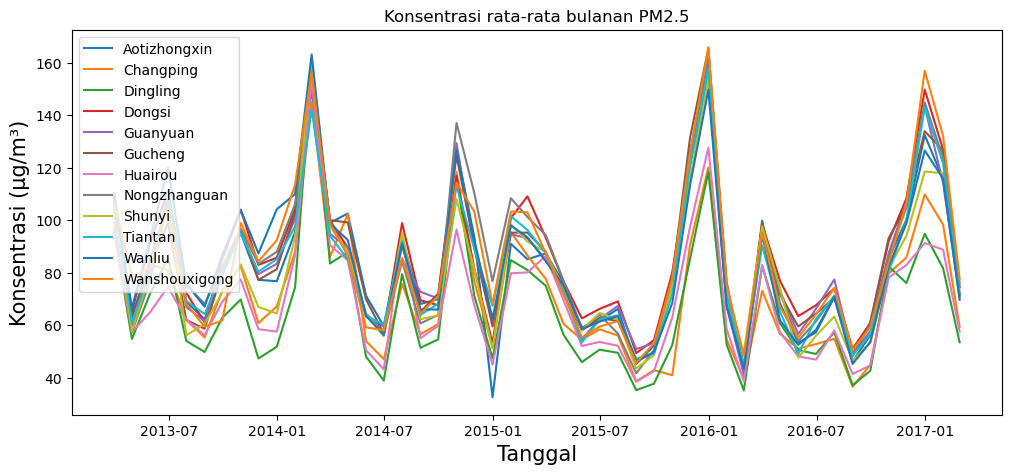

In [17]:
# Plot konsentrasi rata-rata bulanan PM2.5
plt.figure(figsize=(12, 5))
for i in df_1_locf_monthly.columns:
    plt.plot(df_1_locf_monthly.index.to_pydatetime(), df_1_locf_monthly[i], label=i)
plt.xlabel('Tanggal',size=15)
plt.ylabel('Konsentrasi (µg/m³)',size=15)
plt.legend()
plt.title("Konsentrasi rata-rata bulanan PM2.5")
plt.show()


Pola pada plot diatas untuk setiap stasiun sama dan berhimpit.

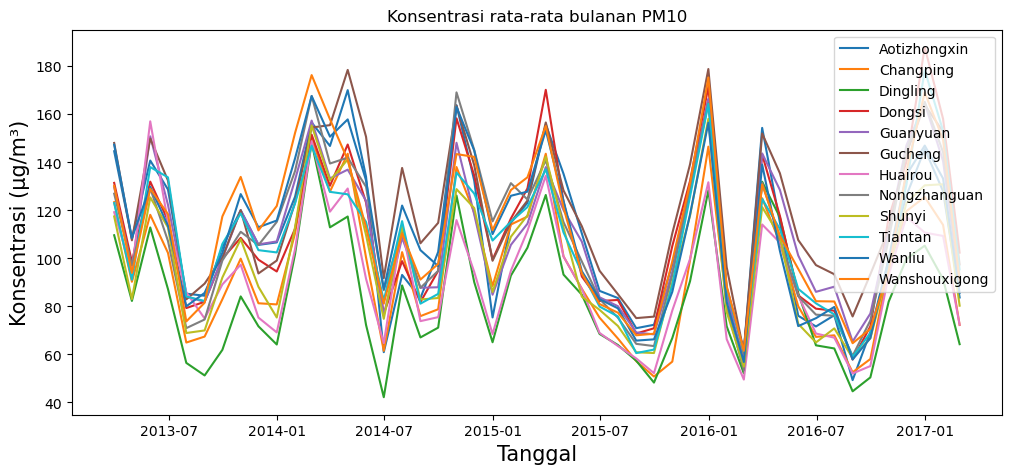

In [18]:
# Plot konsentrasi rata-rata bulanan PM10
plt.figure(figsize=(12, 5))
for i in df_2_locf_monthly.columns:
    plt.plot(df_2_locf_monthly.index.to_pydatetime(), df_2_locf_monthly[i], label=i)
plt.xlabel('Tanggal',size=15)
plt.ylabel('Konsentrasi (µg/m³)',size=15)
plt.legend()
plt.title("Konsentrasi rata-rata bulanan PM10")
plt.show()

Pola pada plot diatas untuk setiap stasiun sama dan berhimpit.

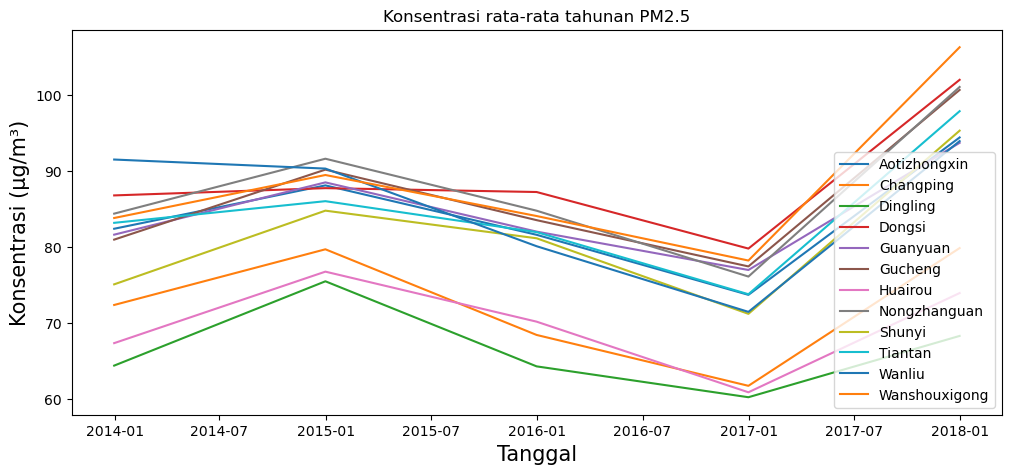

In [19]:
# Plot konsentrasi rata-rata tahunan PM2.5
plt.figure(figsize=(12, 5))
for i in df_1_locf_annually.columns:
    plt.plot(df_1_locf_annually.index.to_pydatetime(), df_1_locf_annually[i], label=i)
plt.xlabel('Tanggal',size=15)
plt.ylabel('Konsentrasi (µg/m³)',size=15)
plt.legend()
plt.title("Konsentrasi rata-rata tahunan PM2.5")
plt.show()

Plot diatas menunjukan pola yang sama untuk setiap stasiun akan tetapi nilainya agak renggang.

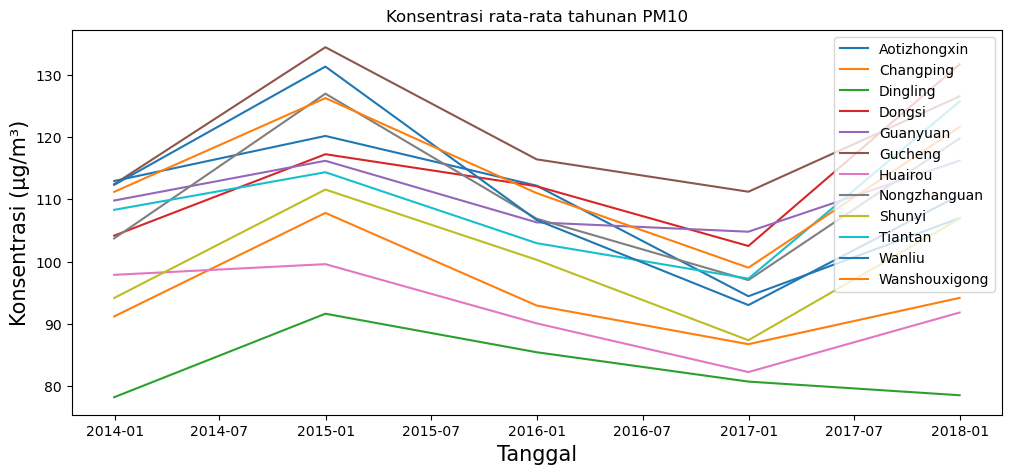

In [20]:
# Plot konsentrasi rata-rata tahunan PM10
plt.figure(figsize=(12, 5))
for i in df_2_locf_annually.columns:
    plt.plot(df_2_locf_annually.index.to_pydatetime(), df_2_locf_annually[i], label=i)
plt.xlabel('Tanggal',size=15)
plt.ylabel('Konsentrasi (µg/m³)',size=15)
plt.legend()
plt.title("Konsentrasi rata-rata tahunan PM10")
plt.show()

Plot diatas menunjukan pola yang sama untuk setiap stasiun akan tetapi nilainya agak renggang.

## Conclusion

- Conclusion pertanyaan 1: Dilihat berdasarkan konsetransi rata-rata tahunan untuk PM2.5 dan PM 10 untuk 1 tahun terakhir, konsentrasi di semua stasiun di atas ambang batas aman. Dari sini disimpulkan bahwa seluruh stasiun serempak menunjukkan bahwa Kota Beijing tidak sehat kualitas udaranya berdasarkan konsentrasi tahuhan PM 2.5 dan PM10. Sedangkan, konsentrasi rata-rata harian PM2.5 menunjukkan rentang 70-80% dan PM10 menunjukkan rentang 92-99%. Persentase ini menunjukkan dari 365 hari di satu terakhir terdapat hari yang tidak aman kualitas udaranya sebesar persentase. Persentase yang dominan ini menunjukkan bahwa kualitas udara tidak sehat dan berbahaya.
- Conclusion pertanyaan 2: Dilihat berdasarkan konsentrasi bulanan baik PM2.5 dan PM10 memperlihatkan pola yang fluktuatif. Pola yang jelas terlihat adalah terdapat kenaikan yang tinggi disetiap awal tahun. Dari sini dapat diambil kebijakan bahwasanya dapat dilakukan pembatasan aktivitas diluar ruangan saat awal tahun. Selain konsentrasi bulanan, konsentrasi tahunan pun terdapat pola. Pola yang ada adalah kenaikan di satu tahun terkahir. Sehingga dihimbau untuk mengeluarkan kebijakan yang bisa menekan angka konsentrasi ini turun dan lebih lagi bisa menurunkan ke batas aman.

In [21]:
# Membuat file CSV untuk digunakan pada pembuatan dashboard
df_1_locf.to_csv("Preprocessed Data/pm25.csv")
df_2_locf.to_csv("Preprocessed Data/pm10.csv")